<h1><center>Exploring Weather Trends of Bandung, Indonesia</center></h1>

**city_data was extracted by using the SQL query: SELECT * FROM city_data. 
<br>city_list was extracted by using the SQL query: SELECT * FROM city_list. 
<br>global_data was extracted by using the SQL query: SELECT * FROM global_data. 
<br>city_data was named as results(1).csv 
<br>city_list was named as results(2).csv
<br>global_data was named as results(3).csv
<br>The extracted .csv files are placed in the computer's local disk.
<br>These files are then accessed from this Jupyter Notebook.
<br>Tools used are basic SQL and Python**

In [2]:
import pandas as pd

city_data=pd.read_csv("C:\\Users\\Reinaldy\\Downloads\\results (1).csv")
city_list=pd.read_csv("C:\\Users\\Reinaldy\\Downloads\\results (2).csv")
global_data=pd.read_csv("C:\\Users\\Reinaldy\\Downloads\\results (3).csv")

## Find out cities of interest in Indonesia

In [3]:
city_list.loc[city_list.country=="Indonesia",:]

,city,country
29,Bandung,Indonesia
136,Jakarta,Indonesia
197,Medan,Indonesia
236,Palembang,Indonesia
287,Semarang,Indonesia
298,Surabaya,Indonesia


## Bandung is chosen as the city to be analyzed

Text(0.5,1,'Annual Average Temperature\nof Indonesian Cities')

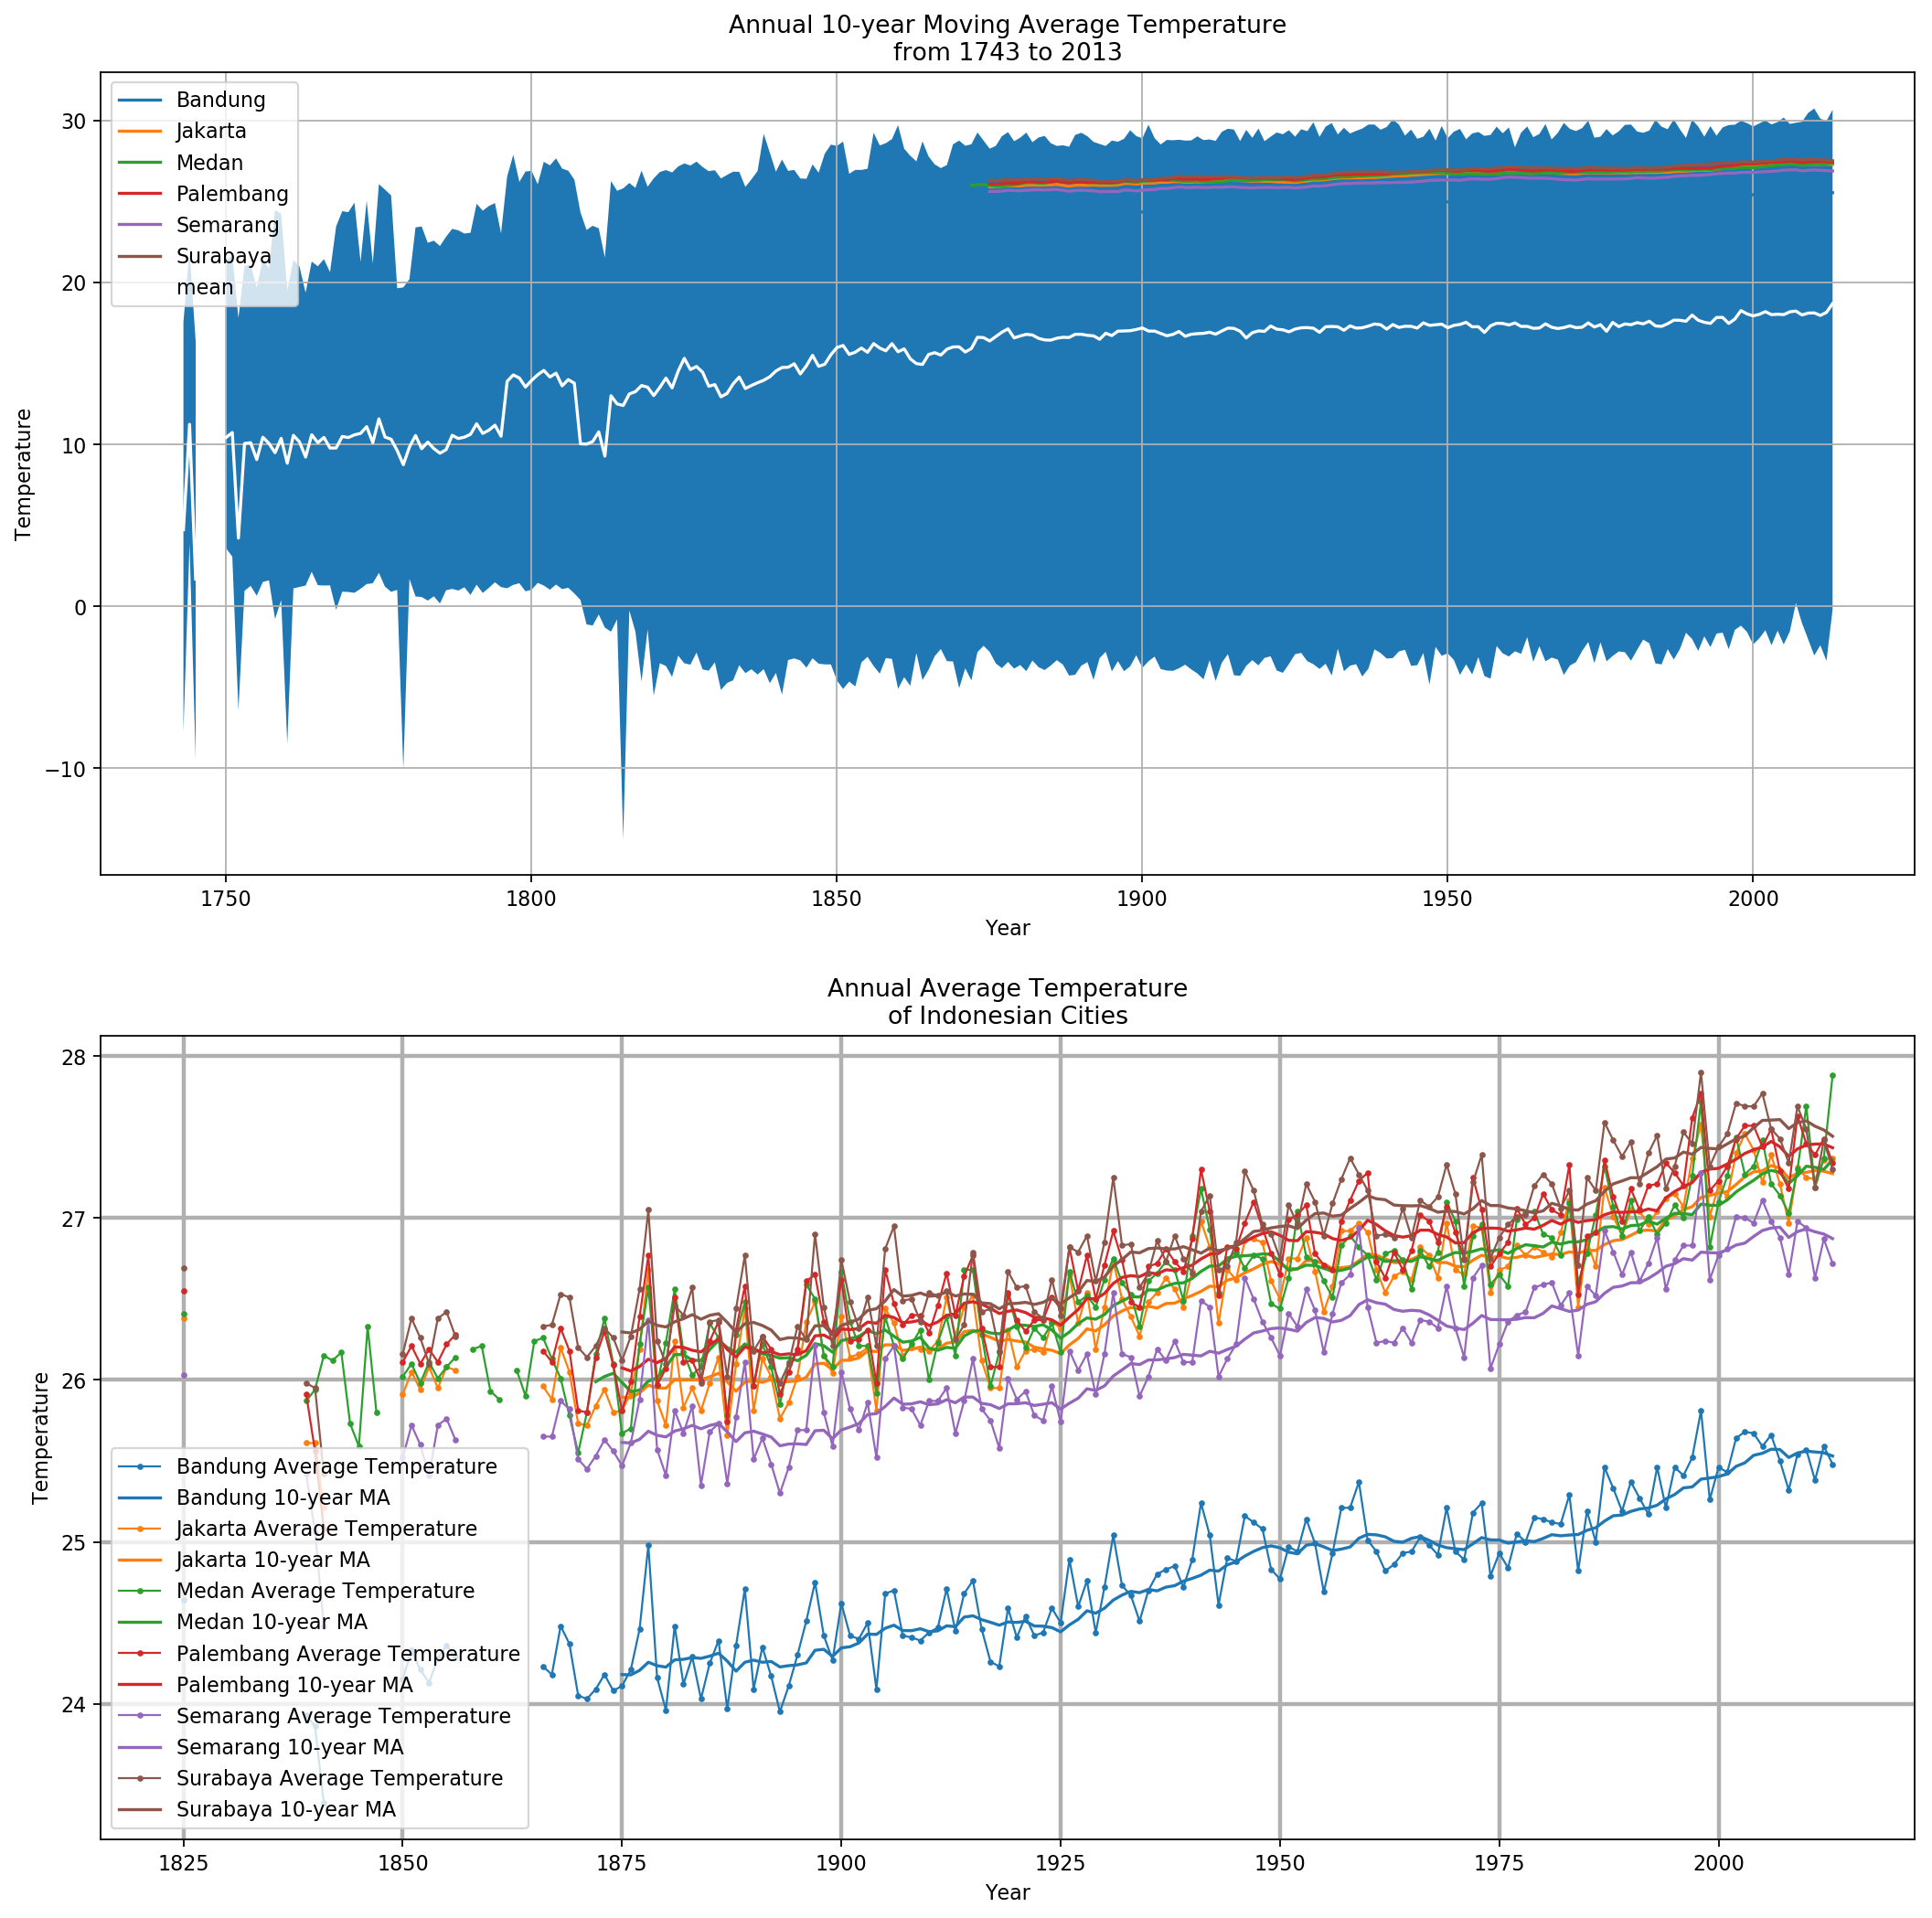

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
#from matplotlib import style

#style.use("fivethirtyeight")

#define a 10-year moving_average function
def moving_average(x):
    return(x.rolling(10).mean())

data1 = city_data.groupby('year')['avg_temp'].agg(['min','max','mean'])
data2 = pd.merge(city_data.pivot_table(values="avg_temp",index="year",columns="city"),global_data,on="year")
x = data2.year
indonesian_cities = ["year"]+city_list.loc[city_list.country=="Indonesia","city"].tolist()
data2 = data2.loc[:,indonesian_cities]

fig = plt.figure(figsize=(16,16),dpi=80)
#Annual Average Temperature from 1743 to 2013 
ax = fig.add_subplot(2, 1, 1)
for column in data2.columns[1:]:
    ax.plot(x,moving_average(data2.loc[:,column]))
    #ax.legend()
ax.plot(data1.index,data1.loc[:,"mean"],label="mean",c="white")
ax.legend()
ax.grid()
ax.fill_between(x=data1.index,y1='min',y2='max', data=data1)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")
ax.set_title("Annual 10-year Moving Average Temperature\nfrom 1743 to 2013")


ax = fig.add_subplot(2, 1, 2)
for column in data2.columns[1:]:
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(x,data2.loc[:,column],marker="o",markersize=2,linewidth=1,color=color,label=column+" Average Temperature")
    ax.plot(x,moving_average(data2.loc[:,column]),color=color,label=column+" 10-year MA")
    ax.legend()
ax.grid(linewidth=2)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")
ax.set_title("Annual Average Temperature\nof Indonesian Cities")

### From the first plot, we can learn that the cities in Indonesia are considered hotter than most cities in the world.
### From the second plot, it is observed that Bandung is the city with lowest annual temperature averaged throughout the year 1850 to 2013, meanwhile Surabaya was the hottest among the 6 cities.
### Bandung's annual temperature varied between 24.2 to 25.5 degrees Celsius, an increase of 1.5 degrees Celsius over the 163 years time span, meanwhile Jakarta as Indonesia's Capital has its annual temperature varied between 25.8 to 27.5 degrees Celsius
### Overall, the plot shows a similar trend of increasing average temperature for the 6 cities.

Text(0.5,1,'Global Annual Average Temperature')

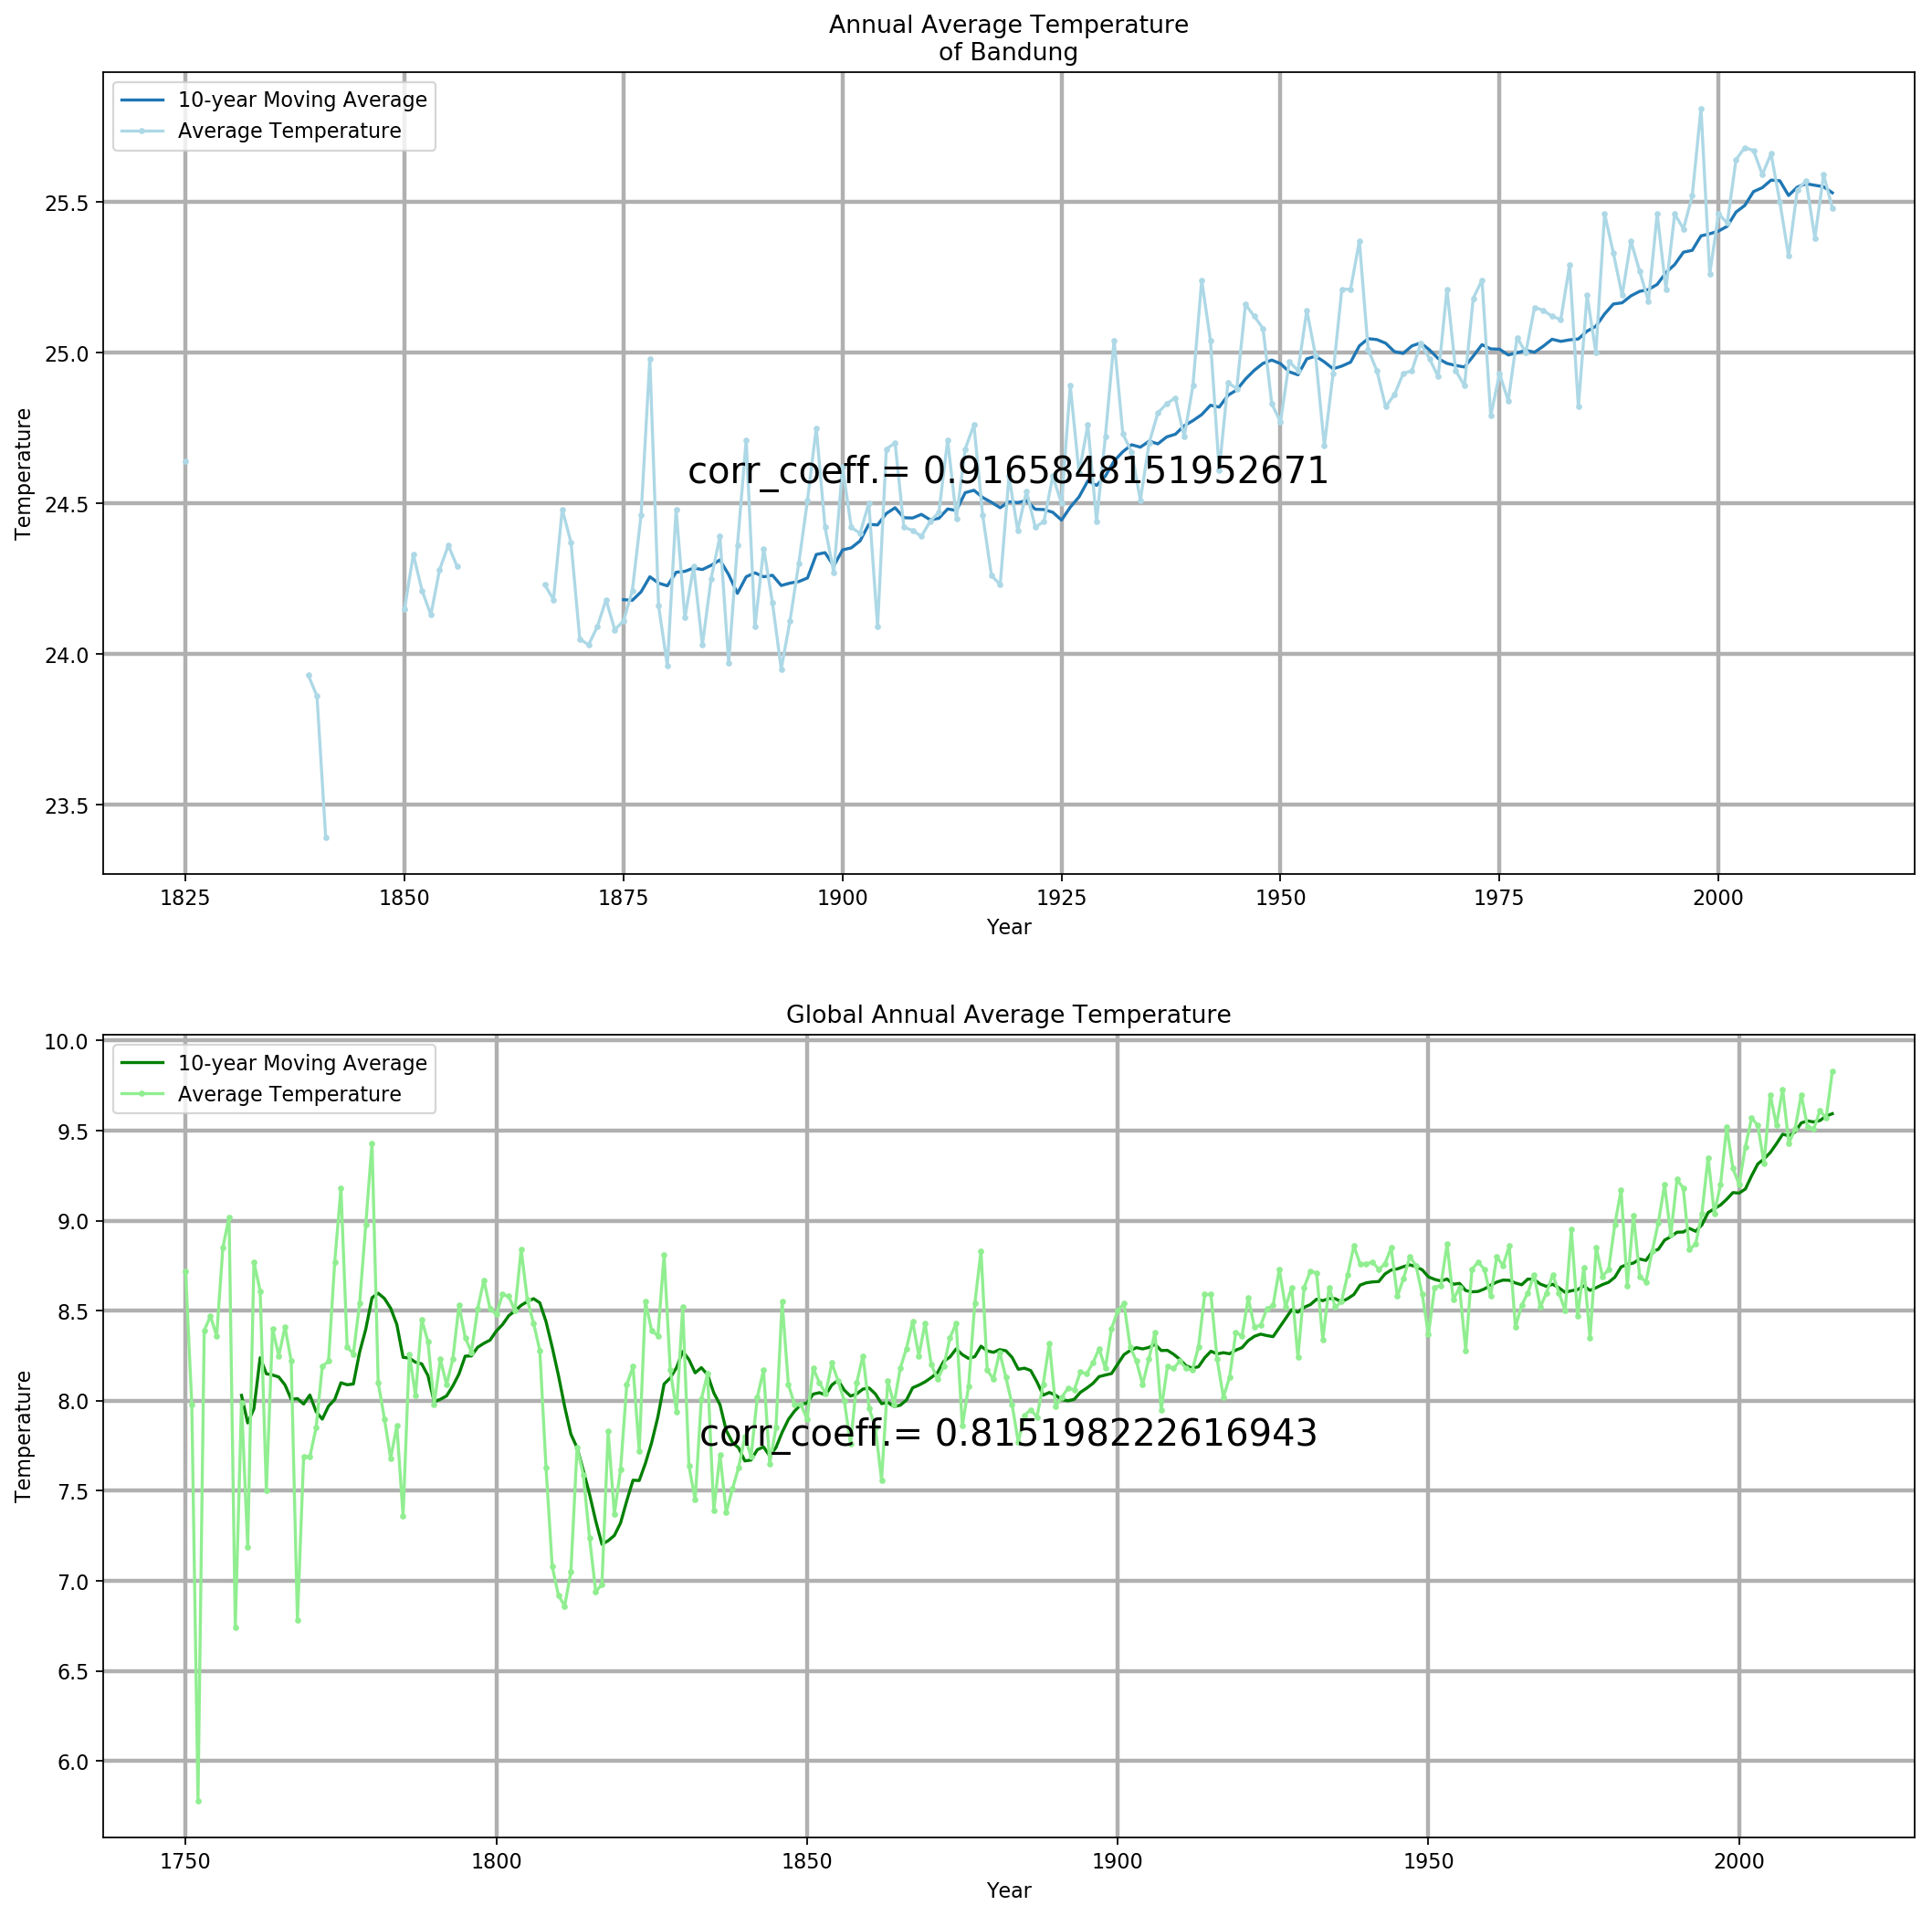

In [5]:
fig = plt.figure(figsize=(16,16),dpi=80)

ax = fig.add_subplot(2, 1, 1)
ax.plot(x,moving_average(data2.loc[:,"Bandung"]),label="10-year Moving Average")
ax.plot(x,data2.loc[:,"Bandung"],marker="o",markersize=2,color="lightblue",label="Average Temperature")
ax.text(0.5, 0.5, "corr_coeff.= "+str(data2.loc[:,"Bandung"].corr(moving_average(data2.loc[:,"Bandung"]))), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=18)
ax.legend()
ax.grid(linewidth=2)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")
ax.set_title("Annual Average Temperature\nof Bandung")

ax = fig.add_subplot(2, 1, 2)
ax.plot(global_data.year,moving_average(global_data.loc[:,"avg_temp"]),label="10-year Moving Average",color="green")
ax.plot(global_data.year,global_data.loc[:,"avg_temp"],label="Average Temperature",marker="o",markersize=2,color="lightgreen")
ax.text(0.5, 0.5, "corr_coeff.= "+str(global_data.loc[:,"avg_temp"].corr(moving_average(global_data.loc[:,"avg_temp"]))), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize=18)
ax.legend()
ax.grid(linewidth=2)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature")
ax.set_title("Global Annual Average Temperature")

### The third plot shows a 10-year moving average plot together with data points plotted along the years 1850 to 2013
### The fourth plot shows a 10-year moving average plot together with data points plotted along the years 1750 to 2013
### The two plots share a similar trend of ups and downs of annual average temperature trend 
### The third plot shows a high correlation coefficient of 0.9165
### Similarly, the fourth plot shows a correlation coefficient of 0.815